In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img_3channel = cv2.imread('/Users/margheritataddei/Desktop/DIRECT/PROJECT/partycool/example_images/cut_images/zoom/sem_1_cut_zoom2.jpg', 1)

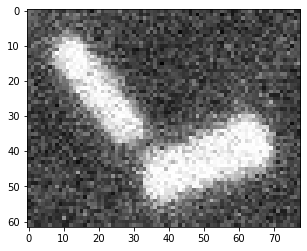

In [3]:
plt.imshow(img_3channel)

In [4]:
img = cv2.imread('/Users/margheritataddei/Desktop/DIRECT/PROJECT/partycool/example_images/cut_images/zoom/sem_1_cut_zoom2.jpg', 0)

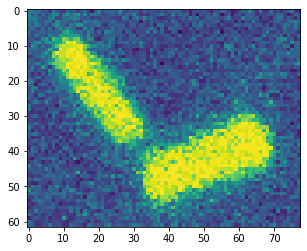

In [5]:
plt.imshow(img)

In [6]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

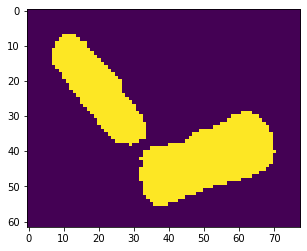

In [7]:
plt.imshow(th)

In [8]:
#Skeleton of the nanoparticles
skel = np.zeros(th.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (8,8))
open = cv2.morphologyEx(th, cv2.MORPH_OPEN, element)
temp = cv2.subtract(th, open)
eroded = cv2.erode(th, element)
skel = cv2.bitwise_or(skel,temp)
erod = eroded.copy()

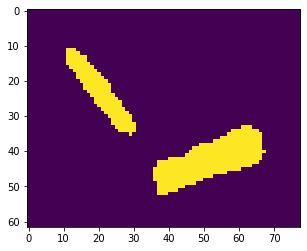

In [9]:
plt.imshow(erod)

In [10]:
# sure background area
sure_bg = cv2.dilate(erod,element,iterations=3)

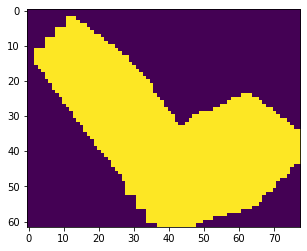

In [11]:
plt.imshow(sure_bg)

In [12]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(erod,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

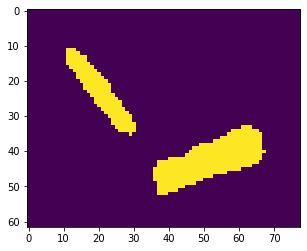

In [13]:
plt.imshow(sure_fg)

In [14]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

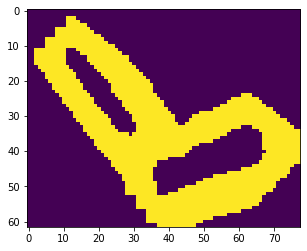

In [15]:
plt.imshow(unknown)

In [16]:
# Contours labelling
ret, contours = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
contours = contours+1

# Now, mark the region of unknown with zero
contours[unknown==255] = 0

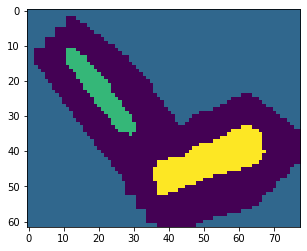

In [17]:
plt.imshow(contours)

In [18]:
contours = cv2.watershed(img_3channel ,contours)

In [19]:
img[contours == -1] = [0]

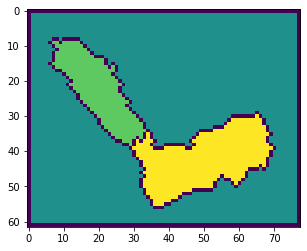

In [20]:
plt.imshow(contours)

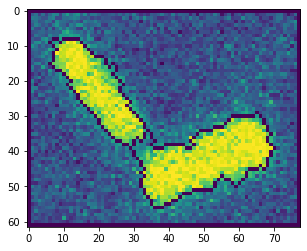

In [21]:
plt.imshow(img)

In [22]:
contours

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       ...,
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

In [23]:
import numpy as np
import cv2

#Function to calculate the area of borders of two close objects
#The watershed function needs the image and we iterate over the iteration in the iterations in the background detection (s_iter) and on i which define how much of the area of the particle is considered.
#The smaller the i, the larger would be the final boundaries
#The larger the i, the smaller will be the final boundaries
#After a lot of trials with different images we found out that the best contours are found when i is between 0.1 and 0.7, o_iter is between 1 and 5 and s_iter is between 1 and 2. 

def watershed(image):
    my_range = np.arange(0.0, 0.7, 0.1)
    img_3channel = cv2.imread(image, 1)
    img = cv2.imread(image, 0)
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    skel = np.zeros(th.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
    open = cv2.morphologyEx(th, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(th, open)
    eroded = cv2.erode(th, element)
    skel = cv2.bitwise_or(skel,temp)
    erod = eroded.copy()
    for s_iter in range(1,5):
        sure_bg = cv2.dilate(erod,element,iterations= s_iter)
        dist_transform = cv2.distanceTransform(erod,cv2.DIST_L2,5)
    for i in my_range:
        ret, sure_fg = cv2.threshold(dist_transform,i*dist_transform.max(),255,0)
        sure_fg = np.uint8(sure_fg)
        unknown = cv2.subtract(sure_bg,sure_fg)
        ret, contours = cv2.connectedComponents(sure_fg)
        contours = contours+1
        contours[unknown==255] = 0
        contours = cv2.watershed(img_3channel ,contours)
        img[contours == -1] = [0]
    
    return contours, plt.imshow(img)

Watershed function on single close particles

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        ...,
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int32),
 <matplotlib.image.AxesImage at 0x11d546dd0>)

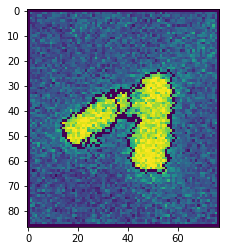

In [28]:
watershed('/Users/margheritataddei/Desktop/DIRECT/PROJECT/partycool/example_images/cut_images/zoom/sem_1_cut_zoom.jpg')

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        ...,
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int32),
 <matplotlib.image.AxesImage at 0x11d4f5490>)

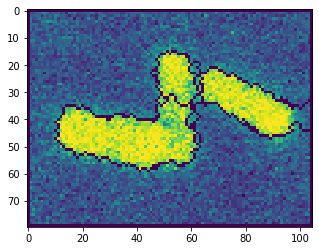

In [29]:
watershed('/Users/margheritataddei/Desktop/DIRECT/PROJECT/partycool/example_images/watershed trial/ws_sem_2_0.jpg')

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        ...,
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int32),
 <matplotlib.image.AxesImage at 0x11d42a110>)

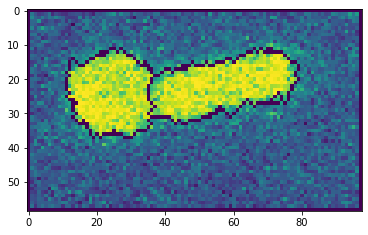

In [30]:
watershed('/Users/margheritataddei/Desktop/DIRECT/PROJECT/partycool/example_images/watershed trial/ws_sem_2_1.jpg')

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        ...,
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int32),
 <matplotlib.image.AxesImage at 0x11d70dc50>)

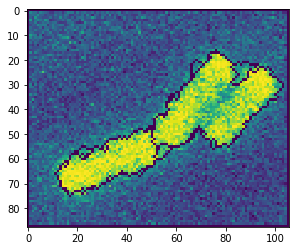

In [31]:
watershed('/Users/margheritataddei/Desktop/DIRECT/PROJECT/partycool/example_images/watershed trial/ws_sem_2_2.jpg')

Watershed in a group of 18 close particles

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        ...,
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int32),
 <matplotlib.image.AxesImage at 0x11d741f90>)

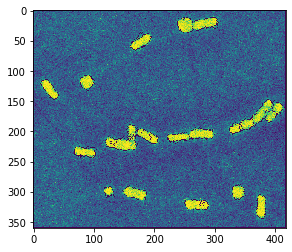

In [32]:
watershed('/Users/margheritataddei/Desktop/DIRECT/PROJECT/partycool/example_images/watershed trial/ws_sem_2_3.jpg')

Watershed in a group of more than 60 particles

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        ...,
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int32),
 <matplotlib.image.AxesImage at 0x11d2e5dd0>)

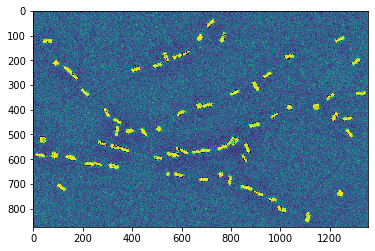

In [34]:
watershed('/Users/margheritataddei/Desktop/DIRECT/PROJECT/partycool/example_images/watershed trial/ws_sem_2_4.jpg')

Watershed on a group of more than 120 particles

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        ...,
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int32),
 <matplotlib.image.AxesImage at 0x11db4afd0>)

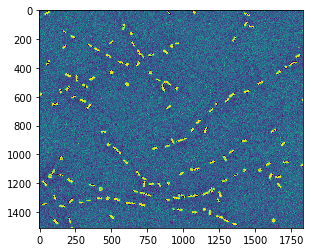

In [36]:
watershed('/Users/margheritataddei/Desktop/DIRECT/PROJECT/partycool/example_images/watershed trial/ws_sem_2_5.jpg')

Watershed on the whole picture

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        ...,
        [-1,  1,  1, ...,  1,  1, -1],
        [-1,  1,  1, ...,  1,  1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int32),
 <matplotlib.image.AxesImage at 0x11d9aa950>)

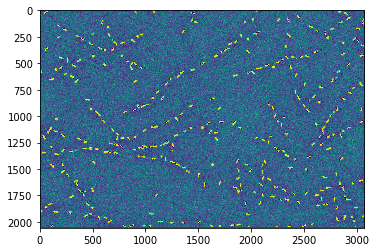

In [37]:
watershed('/Users/margheritataddei/Desktop/DIRECT/PROJECT/partycool/example_images/watershed trial/ws_sem_2_6.jpg')